In [1]:
import os # to get current working directory
import numpy as np # to read example data
import trspecfit as trsfit # main module

In [2]:
# create parent project
project = trsfit.Project(path=os.getcwd())
# create file instance
file = trsfit.File(parent_project=project,
                   energy=np.arange(0, 20, 0.01),
                   time=np.arange(-10, 100, 0.1)
                   )

In [3]:
# load energy model
file.load_model(model_yaml='models_energy.yaml',
                model_info=['single_peak',]
                )

Loading model to describe energy- (and time-)dependent data: single_peak


In [4]:
# add time dependence for one or more parameters
file.add_time_dependence(model_yaml = "models_time.yaml",
                         model_info = ['MonoExpPosIRF',],
                         par_name = "GLP_01_x0"
                         )

Loading model to describe time-dependence of a model parameter: GLP_01_x0 of MonoExpPosIRF model


In [5]:
file.describe_model(model_info=['single_peak',], detail=0)

model name: single_peak
function: Offset from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: Shirley from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
function: GLP from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\trsf-dev\\src\\trspecfit\\functions\\energy.py'>
all (1D flattened if applicable) lmfit.Parameters(): [sorted alphabetically]
Name                        Value      Min      Max   Stderr     Vary     Expr Brute_Step
GLP_01_A                       10        5       15     None     True     None     None
GLP_01_F                        1     0.75      2.5     None     True     None     None
GLP_01_m                      0.3        0        1     None     True     None     None
GLP_01_x0                      10        5       15     None    

In [6]:
# profile using "%prun"

# parallel
#file.model_active.create_value2D_parallel()
#%prun file.model_active.create_value2D_parallel()

# serial
file.model_active.create_value2D()
#%prun file.model_active.create_value2D()

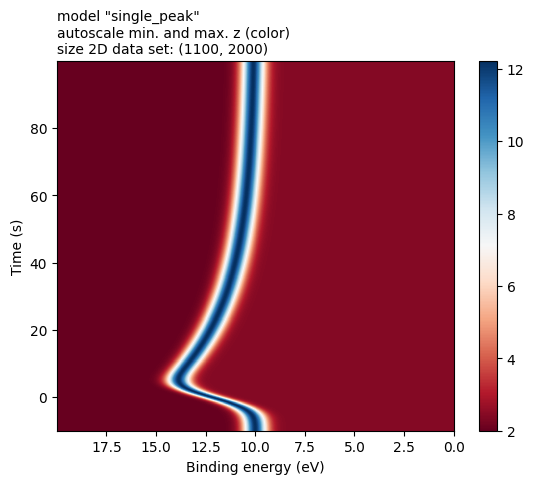

In [7]:
#file.model_active.plot_1D()
file.model_active.plot_2D()

In [8]:
file.reset_models()